# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# url json

# set the api base url
url = "http://api.openweathermap.org/data/2.5/weather?"

test_url = f"{url}q=London,uk&appid={weather_api_key}"

# get weather data
weather_response = requests.get(test_url)
weather_json = weather_response.json()

# get the temperature from the response
# print(f"The weather API responded with: {weather_json}.")
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 3},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1706288041,
 'id': 2643743,
 'main': {'feels_like': 277.94,
          'humidity': 62,
          'pressure': 1032,
          'temp': 280.96,
          'temp_max': 282.09,
          'temp_min': 279.02},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 2075535,
         'sunrise': 1706255296,
         'sunset': 1706287035,
         'type': 2},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 260, 'speed': 5.14}}


In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send the API request
        response = requests.get(city_url)

        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | qaqortoq
Processing Record 3 of Set 1 | abalak
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | aasiaat
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | acarau
Processing Record 12 of Set 1 | hadibu
Processing Record 13 of Set 1 | bargara
City not found. Skipping...
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | tagab
Processing Record 16 of Set 1 | howrah
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | el fula
City not found. Skipping...
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [6]:
# shape
city_data_df.shape

(582, 9)

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,278.31,80,20,4.12,GB,1706288827
1,qaqortoq,60.7167,-46.0333,256.19,64,1,6.50,GL,1706288827
2,abalak,58.1286,68.5944,261.68,87,98,1.68,RU,1706288828
3,olonkinbyen,70.9221,-8.7187,271.09,74,88,7.98,SJ,1706288828
4,iqaluit,63.7506,-68.5145,247.42,68,40,8.75,CA,1706288554


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,278.31,80,20,4.12,GB,1706288827
1,qaqortoq,60.7167,-46.0333,256.19,64,1,6.50,GL,1706288827
2,abalak,58.1286,68.5944,261.68,87,98,1.68,RU,1706288828
3,olonkinbyen,70.9221,-8.7187,271.09,74,88,7.98,SJ,1706288828
4,iqaluit,63.7506,-68.5145,247.42,68,40,8.75,CA,1706288554


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

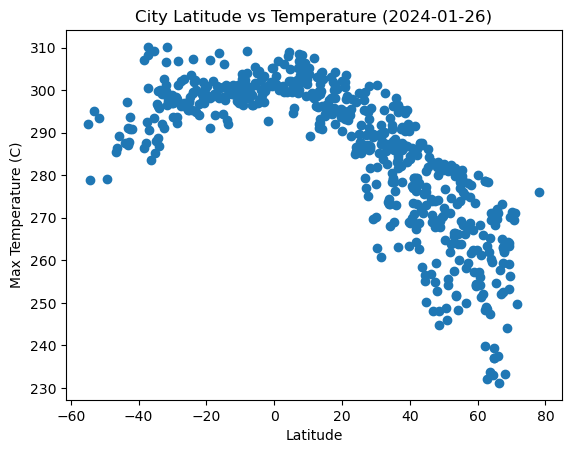

In [11]:
# Build scatter plot for latitude vs. temperature

# assign x and y axis to variables
x_axis_temp = city_data_df["Lat"]
y_axis_temp = city_data_df["Max Temp"]

# create scatter plot using variables
plt.scatter(x_axis_temp, y_axis_temp)

# Incorporate the other graph properties
# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs Temperature (2024-01-26)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

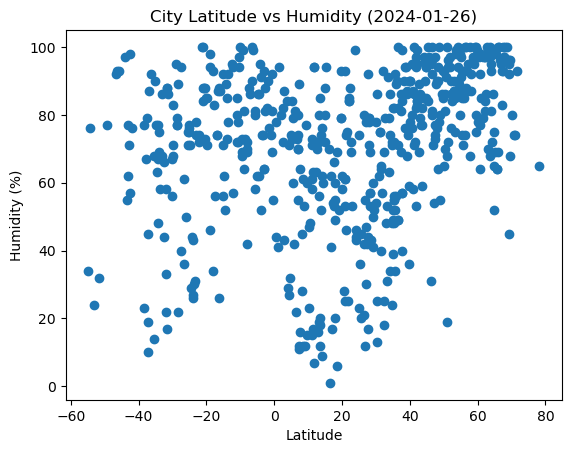

In [12]:
# Build the scatter plots for latitude vs. humidity

# assign x and y axis to variables
x_axis_humid = city_data_df["Lat"]
y_axis_humid = city_data_df["Humidity"]

# create scatter plot using variables
plt.scatter(x_axis_humid, y_axis_humid)

# Incorporate the other graph properties

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (2024-01-26)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

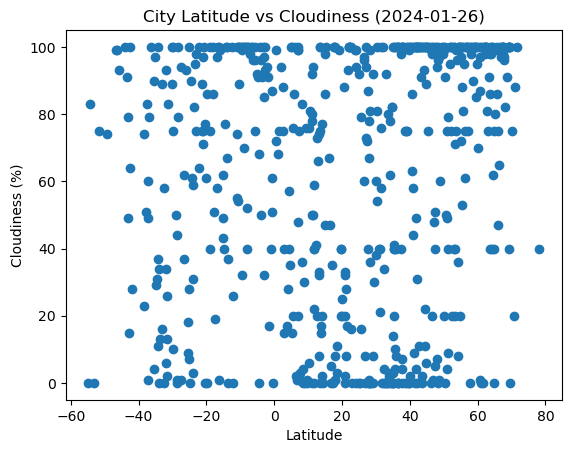

In [13]:
# Build the scatter plots for latitude vs. cloudiness

# assign x and y axis to variables
x_axis_cloud = city_data_df["Lat"]
y_axis_cloud = city_data_df["Cloudiness"]

# create scatter plot using variables
plt.scatter(x_axis_cloud, y_axis_cloud)

# Incorporate the other graph properties

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (2024-01-26)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

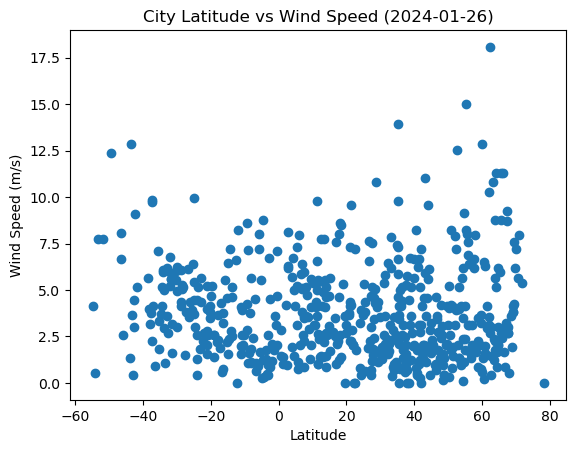

In [14]:
# Build the scatter plots for latitude vs. wind speed

# assign x and y axis to variables
x_axis_wind = city_data_df["Lat"]
y_axis_wind = city_data_df["Wind Speed"]

# create scatter plot using variables
plt.scatter(x_axis_wind, y_axis_wind)

# Incorporate the other graph properties

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed (2024-01-26)')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots

# create function
def plot_linear_regression(x, y):
    # perform regression
    (slope, intercept, r_value, p_value, std_err) = st.linregress(x, y)

    # create regression line equation
    lr_equation = f'y = {slope:.2f}x + {intercept:.2f}'

    # calculate predicted values
    predicted_y = slope * x + intercept

    # add return variables to a list
    return_set = [slope, intercept, r_value]

    # return list
    return return_set


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,278.31,80,20,4.12,GB,1706288827
1,qaqortoq,60.7167,-46.0333,256.19,64,1,6.50,GL,1706288827
2,abalak,58.1286,68.5944,261.68,87,98,1.68,RU,1706288828
3,olonkinbyen,70.9221,-8.7187,271.09,74,88,7.98,SJ,1706288828
4,iqaluit,63.7506,-68.5145,247.42,68,40,8.75,CA,1706288554


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,blackmans bay,-43.0167,147.3167,287.22,62,49,0.45,AU,1706288828
7,bredasdorp,-34.5322,20.0403,296.79,63,31,5.14,ZA,1706288828
9,waitangi,-43.9535,-176.5597,287.49,97,100,1.34,NZ,1706288829
10,acarau,-2.8856,-40.1200,303.25,64,97,6.71,BR,1706288829
15,invercargill,-46.4000,168.3500,286.49,93,99,8.05,NZ,1706288830


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8387938978662084


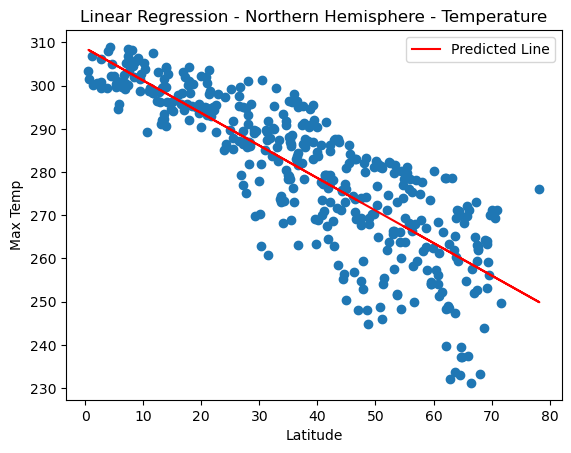

In [23]:
# Linear regression on Northern Hemisphere

# assign x and y axis to variables
x_axis_nh_temp = northern_hemi_df["Lat"]
y_axis_nh_temp = northern_hemi_df["Max Temp"]

# call linear_regression function and get slope and intercept
plot_list = plot_linear_regression(x_axis_nh_temp, y_axis_nh_temp)
slope = plot_list[0]
intercept = plot_list[1]
r_value = plot_list[2]

# calculate predicted values using slope and intercept
predicted_y = [slope * x + intercept for x in x_axis_nh_temp]

# plot data points and predicted values
plt.scatter(x_axis_nh_temp, y_axis_nh_temp)
plt.plot(x_axis_nh_temp, predicted_y, color='red', label='Predicted Line')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Linear Regression - Northern Hemisphere - Temperature')
plt.legend()

# print r value to terminal
print(f"The r-value is: {r_value}")

# save figure
plt.savefig("output_data/Fig5.png")

# display plot
plt.show()

The r-value is: 0.5080030046546237


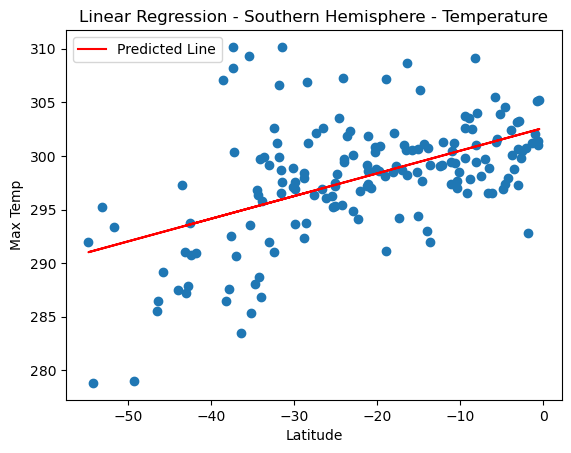

In [24]:
# Linear regression on Southern Hemisphere
# assign x and y axis to variables
x_axis_sh_temp = southern_hemi_df["Lat"]
y_axis_sh_temp = southern_hemi_df["Max Temp"]

# call linear_regression function and get slope and intercept
plot_list = plot_linear_regression(x_axis_sh_temp, y_axis_sh_temp)
slope = plot_list[0]
intercept = plot_list[1]
r_value = plot_list[2]

# calculate predicted values using slope and intercept
predicted_y = [slope * x + intercept for x in x_axis_sh_temp]

# plot data points and predicted values
plt.scatter(x_axis_sh_temp, y_axis_sh_temp)
plt.plot(x_axis_sh_temp, predicted_y, color='red', label='Predicted Line')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Linear Regression - Southern Hemisphere - Temperature')
plt.legend()

# print r value to terminal
print(f"The r-value is: {r_value}")

# save figure
plt.savefig("output_data/Fig6.png")

# display plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [2]:
# Discussion about the linear relationship between temperature and latitude :
#
# The two lines for northern and southern hemisphere latitude vs Max Temp are both pretty much how you would expect.  For both - as you get closer to the equator, the Max Temp generally rises.
# For my random set of cities - the line was steeper in the northern hemisphere, meaning the drop off as you head away from the equator is a bit sharper. (-.83 vs .51) - The data from the
# northern hemisphere also appears to be somewhat more predictable.
#



The r-value is: 0.5338237422554601


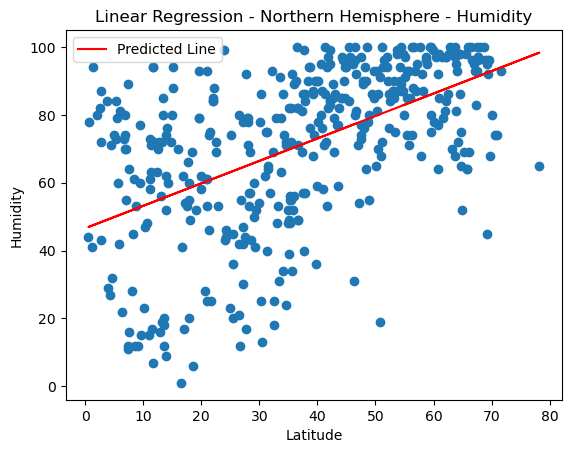

In [26]:
# Northern Hemisphere
# assign x and y axis to variables
x_axis_nh_humid = northern_hemi_df["Lat"]
y_axis_nh_humid = northern_hemi_df["Humidity"]

# call linear_regression function and get slope and intercept
plot_list = plot_linear_regression(x_axis_nh_humid, y_axis_nh_humid)
slope = plot_list[0]
intercept = plot_list[1]
r_value = plot_list[2]

# calculate predicted values using slope and intercept
predicted_y = [slope * x + intercept for x in x_axis_nh_humid]

# plot data points and predicted values
plt.scatter(x_axis_nh_humid, y_axis_nh_humid)
plt.plot(x_axis_nh_humid, predicted_y, color='red', label='Predicted Line')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression - Northern Hemisphere - Humidity')
plt.legend()

# print r value to terminal
print(f"The r-value is: {r_value}")

# save figure
plt.savefig("output_data/Fig7.png")

# display plot
plt.show()

The r-value is: 0.27424964687411696


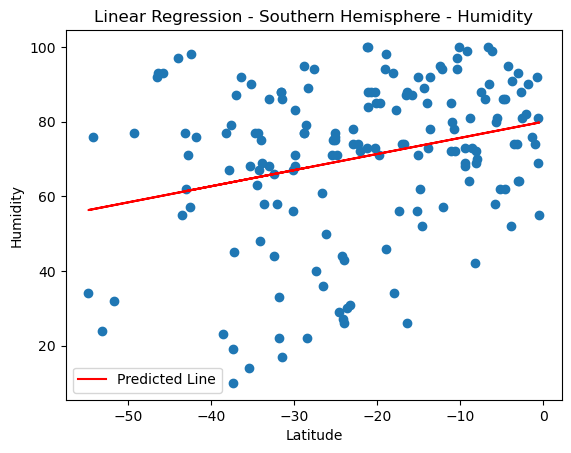

In [28]:
# Southern Hemisphere
# assign x and y axis to variables
x_axis_sh_humid = southern_hemi_df["Lat"]
y_axis_sh_humid = southern_hemi_df["Humidity"]

# call linear_regression function and get slope and intercept
plot_list = plot_linear_regression(x_axis_sh_humid, y_axis_sh_humid)
slope = plot_list[0]
intercept = plot_list[1]
r_value = plot_list[2]

# calculate predicted values using slope and intercept
predicted_y = [slope * x + intercept for x in x_axis_sh_humid]

# plot data points and predicted values
plt.scatter(x_axis_sh_humid, y_axis_sh_humid)
plt.plot(x_axis_sh_humid, predicted_y, color='red', label='Predicted Line')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression - Southern Hemisphere - Humidity')
plt.legend()

# print r value to terminal
print(f"The r-value is: {r_value}")

# save figure
plt.savefig("output_data/Fig8.png")

# display plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Discussion about the linear relationship between humidity and latitude :
#
# The two results for northern and southern hemisphere latitude vs humidity were very surprising to me. I was expecting a similar result to the Max Temp plots - that both would have opposite
# slope lines, with similar results as you move north or south (respectively) away from the equator.  But that is not what I got!  In the northern hemisphere - as you head north away from the
# equator - the humidity (and presumably precipitation) increases.  But in the southern hemisphere - the same thing happens in reverse - as you get closer to the equator - still heading north,
# the humidity increases also.  Very weird!  I would be interested to see if that holds true across other students data sets as well.  The increase was nominally sharper in the northern
# hemisphere (.53 vs .27)


The r-value is: 0.3123610431344308


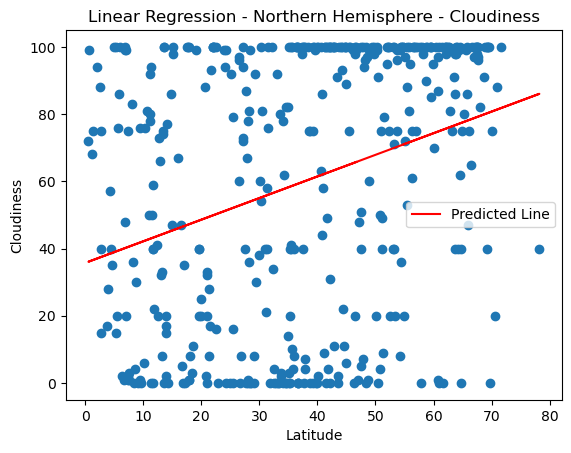

In [29]:
# Northern Hemisphere
# assign x and y axis to variables
x_axis_nh_cloud = northern_hemi_df["Lat"]
y_axis_nh_cloud = northern_hemi_df["Cloudiness"]

# call linear_regression function and get slope and intercept
plot_list = plot_linear_regression(x_axis_nh_cloud, y_axis_nh_cloud)
slope = plot_list[0]
intercept = plot_list[1]
r_value = plot_list[2]

# calculate predicted values using slope and intercept
predicted_y = [slope * x + intercept for x in x_axis_nh_cloud]

# plot data points and predicted values
plt.scatter(x_axis_nh_cloud, y_axis_nh_cloud)
plt.plot(x_axis_nh_cloud, predicted_y, color='red', label='Predicted Line')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression - Northern Hemisphere - Cloudiness')
plt.legend()

# print r value to terminal
print(f"The r-value is: {r_value}")

# save figure
plt.savefig("output_data/Fig9.png")

# display plot
plt.show()

The r-value is: 0.22626225769865724


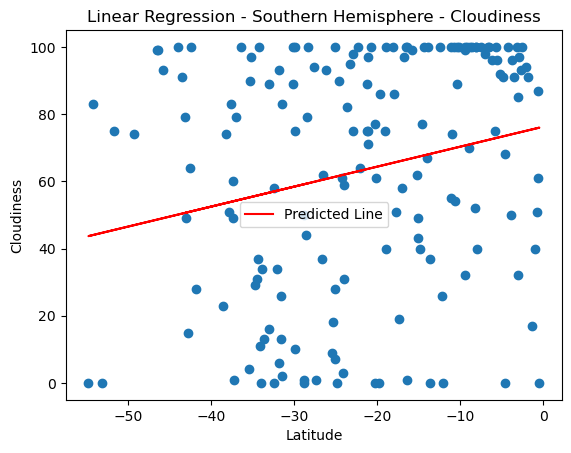

In [30]:
# Southern Hemisphere
# assign x and y axis to variables
x_axis_sh_cloud = southern_hemi_df["Lat"]
y_axis_sh_cloud = southern_hemi_df["Cloudiness"]

# call linear_regression function and get slope and intercept
plot_list = plot_linear_regression(x_axis_sh_cloud, y_axis_sh_cloud)
slope = plot_list[0]
intercept = plot_list[1]
r_value = plot_list[2]

# calculate predicted values using slope and intercept
predicted_y = [slope * x + intercept for x in x_axis_sh_cloud]

# plot data points and predicted values
plt.scatter(x_axis_sh_cloud, y_axis_sh_cloud)
plt.plot(x_axis_sh_cloud, predicted_y, color='red', label='Predicted Line')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression - Southern Hemisphere - Cloudiness')
plt.legend()

# print r value to terminal
print(f"The r-value is: {r_value}")

# save figure
plt.savefig("output_data/Fig10.png")

# display plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [4]:
# Discussion about the linear relationship between cloudiness and latitude :
#  As with the humidity relationship - the cloudiness linear relationships are both positive lines.  Meaning they both increase as you go north - which is not exactly what I was expecting.
# For the southern hemisphere - it is cloudier near the equator generally.  Very interesting.  Again, the northern hemisphere had the steeper line (.31 vs .23), but not by that much.  
# 
#

The r-value is: 0.046584636205494134


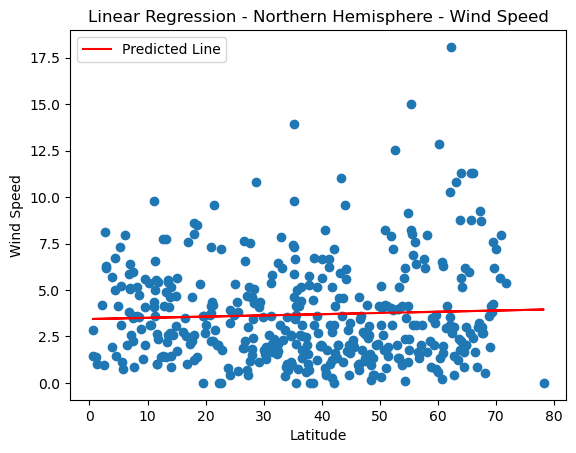

In [31]:
# Northern Hemisphere
# assign x and y axis to variables
x_axis_nh_wind = northern_hemi_df["Lat"]
y_axis_nh_wind = northern_hemi_df["Wind Speed"]

# call linear_regression function and get slope and intercept
plot_list = plot_linear_regression(x_axis_nh_wind, y_axis_nh_wind)
slope = plot_list[0]
intercept = plot_list[1]
r_value = plot_list[2]

# calculate predicted values using slope and intercept
predicted_y = [slope * x + intercept for x in x_axis_nh_wind]

# plot data points and predicted values
plt.scatter(x_axis_nh_wind, y_axis_nh_wind)
plt.plot(x_axis_nh_wind, predicted_y, color='red', label='Predicted Line')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression - Northern Hemisphere - Wind Speed')
plt.legend()

# print r value to terminal
print(f"The r-value is: {r_value}")

# save figure
plt.savefig("output_data/Fig11.png")

# display plot
plt.show()

The r-value is: -0.33156651877613874


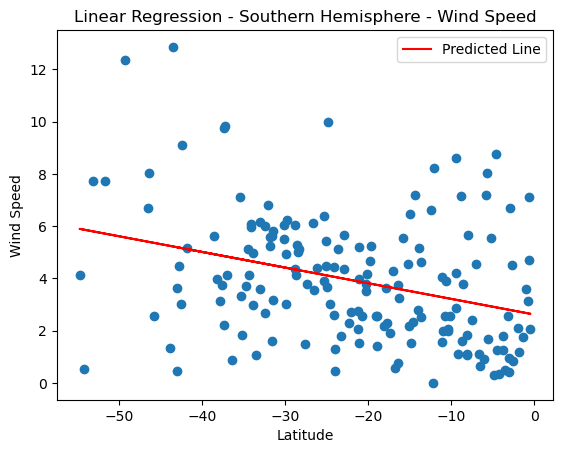

In [32]:
# Southern Hemisphere
# assign x and y axis to variables
x_axis_sh_wind = southern_hemi_df["Lat"]
y_axis_sh_wind = southern_hemi_df["Wind Speed"]

# call linear_regression function and get slope and intercept
plot_list = plot_linear_regression(x_axis_sh_wind, y_axis_sh_wind)
slope = plot_list[0]
intercept = plot_list[1]
r_value = plot_list[2]

# calculate predicted values using slope and intercept
predicted_y = [slope * x + intercept for x in x_axis_sh_wind]

# plot data points and predicted values
plt.scatter(x_axis_sh_wind, y_axis_sh_wind)
plt.plot(x_axis_sh_wind, predicted_y, color='red', label='Predicted Line')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression - Southern Hemisphere - Wind Speed')
plt.legend()

# print r value to terminal
print(f"The r-value is: {r_value}")

# save figure
plt.savefig("output_data/Fig12.png")

# display plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Discussion about the linear relationship between wind speed and latitude :
# Once again, I am pretty surprised by these results.  For the northern hemisphere, the line is almost totally flat (.046) - and the results plotted look very difficult to predict based on this.
# For the southern hemisphere, one might expect a similar result - but that's not what we are seeing.  We are seeing a down sloping line, and it is much steeper than the line for the cities
# in the northern hemisphere (-.33), translating to calmer wind speeds as the equator is approached when heading north.  This is a very interesting and curious contrast from the flat line in
# the northern hemisphere.  Again, I would be very curious to see other students results for all 8 plots and see if they see similar results, and how similar they are.
#